In [5]:
from model.data import *
from model.utils import *
from model.wgan import *

In [6]:
import pickle
import joblib
import datetime
import os
import pandas as pd
from definitions import RESULT_DIR
from matplotlib import pyplot

In [7]:
EPOCHS = 900

In [8]:
def plot_history(d1_hist, d2_hist, g_hist):
    # plot history
    pyplot.plot(d1_hist, label='crit_real')
    pyplot.plot(d2_hist, label='crit_fake')
    pyplot.plot(g_hist, label='gen')
    pyplot.legend()


In [9]:
def build_and_train(params , d_train, cat_cols , cont_cols):
    gen_layers = [int(params['gen_layer_sizes'])] * int(params['gen_num_layers'])
    crit_layers = [int(params['crit_layer_sizes'])] * int(params['crit_num_layers'])
    
    params['gen_dim'] = gen_layers
    params['crit_dim'] = crit_layers
    epchs = params['EPOCHS']
    
    
    my_wgan = WGAN(params)
    print('Fitting a wgan model for {0} epochs...'.format(epchs))
    curr_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    my_wgan.train(d_train, epchs, 
                    cat_cols, 
                    cont_cols, 
                    batch_size=params['batch_size'], 
                    hard=params['hard'],
                    temp_anneal = params['temp_anneal'], 
                    input_time=curr_time)
    return my_wgan

In [16]:
def main(params=None):
        """params:
        output_dim: integer dimension of the output variables. Note that this includes the one-hot encoding of the categorical varibles

        latent_dim: integer dimension of random noise sampled for the generator

        gen_dim: tuple with the hidden layer dimension for the generator

        crit_dim tuple with hidden layer dimension for the critic

        mode: 'wgan' or 'wgan-gp', deciding which loss function to use

        gp_const: Gradient penalty constant. Only needed if mode == 'wgan-gp'

        n_critic: Number of critic learning iterations per generator iteration
        """

    if params is None:
        params = {
            # Regular parameters
            'training_set': 'test.csv',
            'EPOCHS' : EPOCHS,
            'embedding_dim': 128,
            'gen_num_layers': 2,
            'gen_layer_sizes': 256,
            'crit_num_layers': 2,
            'crit_layer_sizes': 256,
            'mode' : 'wgan-gp',
            'gp_const' : 10,
            'n_critic' : 5,
            'batch_size': 500,
            'hard' : False,
            'temp_anneal' : False
        }

    print('Starting wgan main script with following parameters:')
    for key in params:
        print(key, params[key])
    params['model'] = 'wgan'

    # Load dataset 

    data = load_data('C:\\Users\\47405\\Desktop\\Selected Datasets\\Epileptic Seizure\\epileptic.csv')
    dataset   =  data[0]
    cat_cols  =  data[1] 
    cont_cols =  data[2]
    params['output_dim'] = data[3]
    
        
    print('Successfully loaded dataset {0}'.format(params.get('training_set')))

    alist = params.get('training_set')
    basepath = os.path.join(RESULT_DIR, *alist, params.get('model'))

    if params.get('log_directory') != None:
        params['log_directory'] = os.path.join(basepath,params['log_directory'])
    else:
        params['log_directory'] = basepath
    

    # Train or load wgan model
    my_wgan = build_and_train(params , dataset , cat_cols , cont_cols)
    
    return my_wgan

In [17]:
# replace the path in the load_data fuction above to run the script

if __name__ == "__main__":
    wgan = main()

Starting wgan main script with following parameters:
training_set test.csv
EPOCHS 900
embedding_dim 128
gen_num_layers 2
gen_layer_sizes 256
crit_num_layers 2
crit_layer_sizes 256
mode wgan-gp
gp_const 10
n_critic 5
batch_size 500
hard False
temp_anneal False
Successfully loaded dataset test.csv
Fitting a wgan model for 900 epochs...


C:\Users\47405\anaconda3\envs\wgan\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Time for epoch 10 is 0.2515113353729248 sec 
 with critic loss: -1.2397050857543945 and generator loss 1.4843076467514038
Time for epoch 20 is 0.28295040130615234 sec 
 with critic loss: -1.9687107801437378 and generator loss 3.1872265338897705
Time for epoch 30 is 0.2667407989501953 sec 
 with critic loss: -2.694908857345581 and generator loss 4.798435688018799
Time for epoch 40 is 0.27600526809692383 sec 
 with critic loss: -2.9696576595306396 and generator loss 6.262934684753418
Time for epoch 50 is 0.26714372634887695 sec 
 with critic loss: -3.4638447761535645 and generator loss 6.752294063568115
Time for epoch 60 is 0.2980458736419678 sec 
 with critic loss: -3.2534661293029785 and generator loss 6.429277420043945
Time for epoch 70 is 0.2874913215637207 sec 
 with critic loss: -3.022167444229126 and generator loss 6.019476413726807
Time for epoch 80 is 0.29824280738830566 sec 
 with critic loss: -3.3278017044067383 and generator loss 5.808356285095215
Time for epoch 90 is 0.29855

Time for epoch 690 is 0.6119041442871094 sec 
 with critic loss: -3.7520101070404053 and generator loss 7.043194770812988
Time for epoch 700 is 0.5962073802947998 sec 
 with critic loss: -3.580284357070923 and generator loss 7.025354385375977
Time for epoch 710 is 0.6153707504272461 sec 
 with critic loss: -3.9205169677734375 and generator loss 6.809061527252197
Time for epoch 720 is 0.6116068363189697 sec 
 with critic loss: -4.591365814208984 and generator loss 6.958019256591797
Time for epoch 730 is 0.5969057083129883 sec 
 with critic loss: -3.496807813644409 and generator loss 6.629850387573242
Time for epoch 740 is 0.6610927581787109 sec 
 with critic loss: -3.4374892711639404 and generator loss 7.261601448059082
Time for epoch 750 is 0.7221078872680664 sec 
 with critic loss: -3.880063056945801 and generator loss 6.917306423187256
Time for epoch 760 is 0.6769416332244873 sec 
 with critic loss: -4.174783706665039 and generator loss 6.901581764221191
Time for epoch 770 is 0.67557

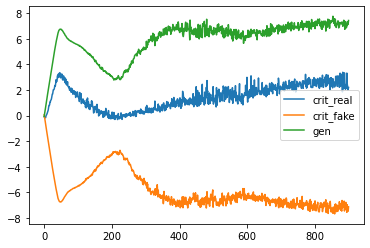

In [18]:
plot_history(wgan.critic_l_real, wgan.critic_l_fake, wgan.generator_l)

In [19]:
df = wgan.sample_df(11500)

C:\Users\47405\anaconda3\envs\wgan\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
df.to_csv('epileptic-fake-wgan300.csv', index=False)

In [20]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,-24.438353,-23.174625,0.555680,19.086020,44.103626,53.848881,50.980957,38.592281,19.146830,-3.935288,...,1.655269,5.919289,-33.582127,-20.099686,-43.887581,12.198530,-17.575487,-13.853444,-21.272436,1
1,-280.570770,-257.907684,-219.988754,-121.612846,-178.522415,-56.177143,-19.632948,-6.948681,41.261650,29.670536,...,97.266289,44.426487,60.291286,-48.887699,-37.989944,-98.040627,-162.431976,-214.822632,-172.788315,2
2,45.050777,7.996722,49.413525,-17.341827,-50.880337,-26.348663,-40.399220,-62.926983,-46.553249,-29.664602,...,-38.038792,-32.665955,-55.555069,-117.588982,-54.939575,-144.313889,-89.045670,-118.455513,-94.479454,5
3,-692.862976,-794.457153,-743.949646,-728.223389,-605.323792,-528.735474,-455.649048,-290.290100,-131.474274,-189.743561,...,-66.461555,-43.913509,-11.980608,78.698296,-6.862305,-101.646767,-145.357346,-155.517166,-312.645020,1
4,7.575976,-43.697365,-20.485580,-2.172718,19.829981,29.984131,25.710739,38.417782,37.725155,48.375904,...,9.920007,20.429932,-10.146167,33.847179,2.093088,-6.736816,44.810513,42.052464,23.740589,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-315.418640,-252.550232,-256.539276,-120.236458,-151.791061,-115.419350,-82.822273,-31.689257,62.602180,140.805496,...,160.097275,91.098633,90.559418,9.774028,-72.790581,-88.511719,-89.263977,-137.078583,-49.526485,2
11496,47.428196,19.165213,-1.275453,15.707163,-47.668140,7.995470,-90.290771,-39.584583,-0.638554,20.323940,...,75.753983,16.495726,-27.257483,39.902054,16.862408,-36.817936,5.798022,19.613474,23.054878,5
11497,-37.238544,-29.899515,-39.872791,-66.977386,-11.930412,-22.805838,41.534199,9.328175,-10.032340,6.756535,...,11.634419,-2.681285,-37.518223,-19.721062,-5.342315,2.267132,-0.551509,24.738405,31.061783,1
11498,173.708664,25.115366,83.307671,2.523246,-12.806651,-4.173203,-2.484870,-123.382088,-184.592163,-270.562378,...,-190.383591,-254.303604,-314.374084,-347.651245,-321.462067,-256.726532,-326.378204,-304.388000,-288.539795,1
